# Figure 5

In [1]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "./data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))
    
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

n_cores = 16

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 29.5 s, sys: 2.87 s, total: 32.4 s
Wall time: 30.3 s


# Distribution engineering for RED20-sfGFP

In [2]:
tRNA_distributions = {}
tRNA_elongrate_distributions = {}
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

from analysis_utils import *
gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')
#wildtype
ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])

codon_elongt = compute_codon_elongt(ptRNA_red20, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_wt = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
print('elongt wildtype', avg_elongt_wt)
tRNA_distributions['GFP_wt'] = [avg_elongt_wt,dict(zip(tRNA_tags,ptRNA_red20)),dict(zip(codon_tags,pCodon_GFP))]

#Uniform
ptRNA_red20_uniform = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20_uniform = ptRNA_red20_uniform[6]/sum(ptRNA_red20_uniform[6])
ptRNA_red20_uniform[ptRNA_red20_uniform>0] = 1/20

codon_elongt = compute_codon_elongt(ptRNA_red20_uniform, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_uniform = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
print('elongt uniform', avg_elongt_uniform)
tRNA_distributions['GFP_uniform'] = [avg_elongt_uniform,dict(zip(tRNA_tags,ptRNA_red20_uniform)),dict(zip(codon_tags,pCodon_GFP))]


#GFP Codon-weighted correlated
ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_GFP,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to GFP codon-sorted tRNA
ptRNA_sorted = tRNA_weightedbycodon[tRNA_sorted_indices]
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

tRNA_sorted_codonweighted = tRNA_sorted.copy()
ptRNA_sorted_codonweighted = ptRNA_sorted.copy()


codon_elongt = compute_codon_elongt(resortedtRNA, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_codonweightedcorrelated = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
print('elongt codon-weighted correlated', avg_elongt_codonweightedcorrelated)

tRNA_distributions['GFP_codonweightedcorrelated'] = [avg_elongt_codonweightedcorrelated,dict(zip(tRNA_tags,resortedtRNA)),dict(zip(codon_tags,pCodon_GFP))]

#GFP Codon-weighted anticorrelated
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_GFP,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to GFP codon-sorted tRNA
ptRNA_sorted = tRNA_weightedbycodon[tRNA_sorted_indices]
ptRNA_sorted_flipped = np.append(np.flip([ptRNA for ptRNA in ptRNA_sorted if ptRNA != 0]),np.array([ptRNA for ptRNA in ptRNA_sorted if ptRNA == 0]))
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted_flipped))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

codon_elongt = compute_codon_elongt(resortedtRNA, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_codonweightedanticorrelated = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
print('elongt codon-weighted anticorrelated', avg_elongt_codonweightedanticorrelated)

tRNA_distributions['GFP_codonweightedanticorrelated'] = [avg_elongt_codonweightedanticorrelated,dict(zip(tRNA_tags,resortedtRNA)),dict(zip(codon_tags,pCodon_GFP))]


########### Genetic algorithm fast and slow #############

print('Starting GA fast and slow')
elongt_list_fast =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_elongt.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_ptRNA.npy')
tRNA_elongrate_distributions['GFP_gafast'] = elongt_list_fast
elongt_fastest = np.min(elongt_list_fast)
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
tRNA_distributions['GFP_gafast'] = [elongt_fastest,dict(zip(tRNA_tags,ptRNA_min)),dict(zip(codon_tags,pCodon_GFP))]
print('GFP fast', tRNA_distributions['GFP_gafast'])

elongt_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_elongt.npy')
ptRNA_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_ptRNA.npy')
tRNA_elongrate_distributions['GFP_gaslow'] = elongt_list_slow
elongt_slowest = np.max(elongt_list_slow)
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
tRNA_distributions['GFP_gaslow'] = [elongt_slowest,dict(zip(tRNA_tags,ptRNA_max)),dict(zip(codon_tags,pCodon_GFP))]
print('GFP slow', tRNA_distributions['GFP_gaslow'])



######### Export all to pickle - will overwrite data file if uncomment ##############

#import pickle
#with open('tRNA_distributions-GFP.pickle', 'wb') as handle:
#    pickle.dump(tRNA_distributions, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('tRNA_elongrate_distributions-GFP.pickle', 'wb') as handle:
#    pickle.dump(tRNA_elongrate_distributions, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
## Checks for tRNA abundances
#a = list(tRNA_distributions['GFP_codonweightedanticorrelated'][1].values())
#np.min(np.array(a)[np.nonzero(a)])

#Check GFP_fast distribution
#import pickle
#with open(r"tRNA_distributions-GFP.pickle", "rb") as input_file:
#    e = pickle.load(input_file)
#e['GFP_gafast']

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt wildtype 170.67146571607904


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt uniform 178.34417989769355


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt codon-weighted correlated 160.86040798976293


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt codon-weighted anticorrelated 201.98069341865528
Starting GA fast and slow
GFP fast [157.0782563093391, {'Ala1B': 0.012213740457866095, 'Ala2': 0.0, 'Arg2': 0.0384598298438721, 'Arg3': 0.0, 'Arg4': 0.0, 'Arg5': 0.0, 'Asn': 0.0781333287422843, 'Asp1': 0.07312459403581285, 'Cys': 0.012242397251647124, 'Gln1': 0.0, 'Gln2': 0.013887117315757497, 'Glu2': 0.05959373167753873, 'Gly2': 0.10302599368310193, 'Gly3': 0.0, 'His': 0.04232258403539275, 'Ile1': 0.05005884125288748, 'Leu1': 0.0, 'Leu2': 0.0, 'Leu3': 0.09902026535639162, 'Leu4': 0.0, 'Leu5': 0.0, 'Lys': 0.08726581015701147, 'Met m': 0.01241237943655594, 'Phe': 0.04439438813084877, 'Pro1': 0.013371694000643442, 'Pro2': 0.0, 'Pro3': 0.0, 'Sec': 0.0, 'Ser1': 0.033396327046990734, 'Ser2': 0.0, 'Ser3': 0.0, 'Ser5': 0.0, 'Thr1': 0.07126737930405906, 'Thr2': 0.0, 'Thr3': 0.0, 'Thr4': 0.0, 'Trp': 0.012213740457866095, 'Tyr1+Tyr2': 0.039550072265957296, 'Val1': 0.0, 'Val2A+2B': 0.10404578554751469}, {'GGG': 0.0, 'GGA': 0.0920502092050209

In [3]:
#GFP GA slow fast optimization only -- standalone code if don't want to run full block of code computing other distributions as above
#Run either this block or the one immediately above otherwise will overwrite tRNA_distributions
tRNA_distributions = {}
from analysis_utils import *
gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')

tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

import numpy as np
elongt_list_fast =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_elongt.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_ptRNA.npy')
elongt_fastest = np.min(elongt_list_fast)
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
tRNA_distributions['GFP_gafast'] = [elongt_fastest,dict(zip(tRNA_tags,ptRNA_min)),dict(zip(codon_tags,pCodon_GFP))]

elongt_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_elongt.npy')
ptRNA_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_ptRNA.npy')
elongt_slowest = np.max(elongt_list_slow)
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
tRNA_distributions['GFP_gaslow'] = [elongt_slowest,dict(zip(tRNA_tags,ptRNA_max)),dict(zip(codon_tags,pCodon_GFP))]

## Controls & Checks

In [4]:
#Max elongt check w/ all tRNA zero but one tRNA = 1 probability, as control
ptRNA_red20_zeros = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20_zeros = ptRNA_red20_zeros[6]/sum(ptRNA_red20_zeros[6])
ptRNA_red20_zeros[ptRNA_red20_zeros>0] = 0
ptRNA_red20_zeros[1] = 1

codon_elongt = compute_codon_elongt(ptRNA_red20_zeros, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_max = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
print('elongt max', avg_elongt_max)

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt max 252.5984238536762


In [10]:
# Manually enter ptRNA
gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')
ptRNA = [0.0059797, 0.,         0.07493208, 0.,        0.     ,    0.,
 0.07962803, 0.07506485, 0.00259992 ,0.        , 0.0160313  ,0.07524019,
 0.08669846 ,0.         ,0.04863804 ,0.05502781 ,0.         ,0.,
 0.08228277 ,0.         ,0.         ,0.07989156 ,0.00939848 ,0.04610216,
 0.00408228 ,0.         ,0.         ,0.         ,0.06124321 ,0.,
 0.         ,0.         ,0.09661121 ,0.         ,0.         ,0.,
 0.0139354  ,0.01994671 ,0.         ,0.06666584]
computeElongationLatency(ptRNA,pCodon_GFP,ensmbl_latency_dict)



([159.98901037188534], [7.666574393451629])

In [11]:
#Set ptRNA as purely uniform
gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')
ptRNA = np.ones(40)*0.00001

computeElongationLatency(ptRNA,pCodon_GFP,ensmbl_latency_dict)

([215.3957635317656], [15.071619992434991])

# Make Heatplot GA fast vs. Uniform vs. GA slow

## Figure 5A plotting a uniform random RED20 distribution

[0.10302599368310193, 0.09902026535639162, 0.08726581015701147, 0.10404578554751469, 0.07126737930405906, 0.07312459403581285, 0.05959373167753873, 0.0781333287422843, 0.04439438813084877, 0.05005884125288748, 0.04232258403539275, 0.033396327046990734, 0.013371694000643442, 0.039550072265957296, 0.0384598298438721, 0.012213740457866095, 0.013887117315757497, 0.01241237943655594, 0.012242397251647124, 0.012213740457866095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
fast 158.78437455994464
uniform 181.7079011198748


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/var/folders/wr/cby0172x24d_6b7kwlbjy44r0000gn/T/ipykernel_6082/2875862163.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


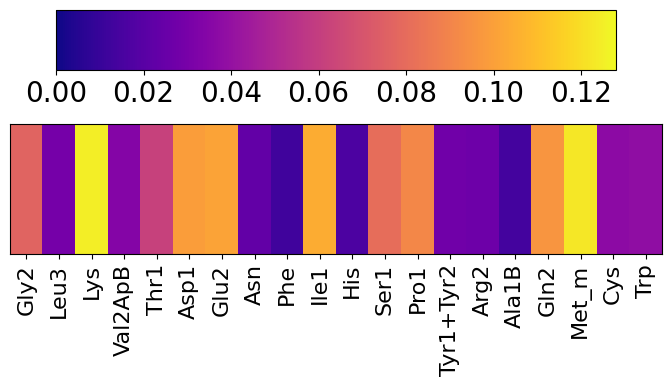

In [47]:
ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_GFP,extra2=True)

ptRNA_list_uniform = np.load('./data/minimaltRNA_minimalcode-sfGFP_100sample_ptRNA.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_ptRNA.npy')
ptRNA_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_ptRNA.npy')

elongt_list_uniform = np.load('./data/minimaltRNA_minimalcode-sfGFP_100sample_elongt.npy')
elongt_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_elongt.npy')
elongt_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_elongt.npy')

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1+Tyr2", "Val1", "Val2ApB"]


#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

ptRNA_sorted=np.delete(ptRNA_sorted,5)
ptRNA_sorted=np.delete(ptRNA_sorted,12)

tRNA_sorted=np.delete(tRNA_sorted,5)
tRNA_sorted=np.delete(tRNA_sorted,12)

ptRNA_sorted = ptRNA_sorted[0:20]

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
print(ptRNA_min_sorted)
print("fast",np.average(elongt_list_fast))

fig, ax2 = plt.subplots(nrows=1, sharex=True,figsize=(7,3))

#Uniform
ptRNA_uniform = ptRNA_list_uniform[0]
ptRNA_uniform_dict = dict(zip(tRNA_tags,ptRNA_uniform))
ptRNA_uniform_sorted=[ptRNA_uniform_dict[tRNA] for tRNA in tRNA_sorted]
x = np.arange(0,20)
y = np.array(ptRNA_uniform_sorted)[0:20]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.128)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])
print("uniform",np.average(elongt_list_uniform))

plt.xticks(range(len(tRNA_tags[0:20])), tRNA_sorted[0:20],rotation='vertical')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.1, 1.1, 0.8, 0.2])
cbar = fig.colorbar(heatmap, cax=cbar_ax,orientation='horizontal',ticks=[0,0.02,0.04,0.06,0.08,0.10,0.12])
cbar.ax.tick_params(labelsize=20)
plt.rcParams.update({'font.size': 16})

plt.tight_layout()
plt.show()  

fig.savefig('./Figures/5A.svg', dpi=300,bbox_inches='tight')

# Synfast and Synslow distributions

In [29]:
#Prior distributions for which experiments were performed
import pickle
with open(r"./tRNA_distributions-GFP.pickle", "rb") as input_file:
    e = pickle.load(input_file)
e.keys()
print(e['GFP_gafast'][1].values())
print(e['GFP_gaslow'][1].values())

dict_values([0.048204638114246794, 0.0, 0.03618178216935147, 0.0, 0.0, 0.0, 0.059981364885348526, 0.0754751853552089, 0.014095078149276317, 0.0, 0.012545073592836742, 0.09676048713507972, 0.08207273693853659, 0.0, 0.020539831304472365, 0.05074935073554299, 0.0, 0.0, 0.08796342374035546, 0.0, 0.0, 0.09743518345055334, 0.012545073592836742, 0.06622090069588156, 0.016644118014926993, 0.0, 0.0, 0.0, 0.04107876164977899, 0.0, 0.0, 0.0, 0.08520426515877168, 0.0, 0.0, 0.0, 0.012213740457866095, 0.013176498402154959, 0.0, 0.07091250645697382])
dict_values([0.02082680434158029, 0.0, 0.12323980161424616, 0.0, 0.0, 0.0, 0.01739667397037426, 0.020975645623160337, 0.12466849269431418, 0.0, 0.12466849269431418, 0.014024373153645861, 0.012468278443788023, 0.0, 0.01609265356515718, 0.01799064138499569, 0.0, 0.0, 0.024129570966893474, 0.0, 0.0, 0.017038592247139092, 0.12466849269431418, 0.01595783216249294, 0.12466849269431418, 0.0, 0.0, 0.0, 0.02415848319473384, 0.0, 0.0, 0.0, 0.01830728715332997, 0.0

fast 158.78437455994464
slow 220.56648350026717


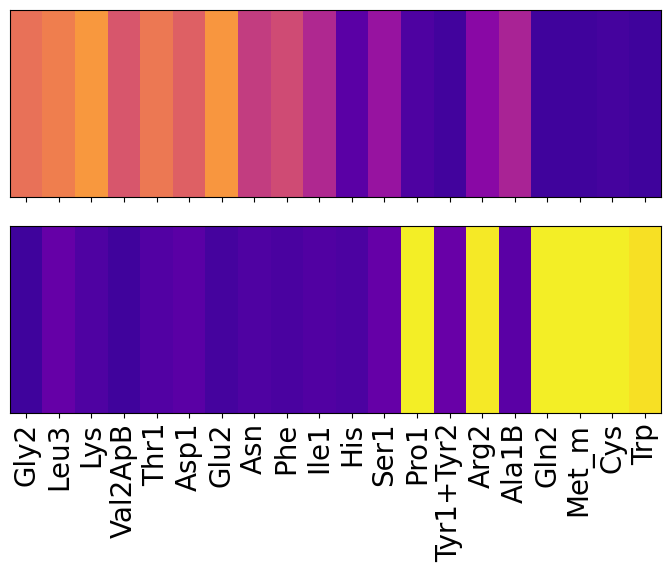

In [42]:
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1+Tyr2", "Val1", "Val2ApB"]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

ptRNA_sorted=np.delete(ptRNA_sorted,5)
ptRNA_sorted=np.delete(ptRNA_sorted,12)

tRNA_sorted=np.delete(tRNA_sorted,5)
tRNA_sorted=np.delete(tRNA_sorted,12)

#Resort ptRNA_min and plot
GA_fast_values =np.array(list(e['GFP_gafast'][1].values()))
ptRNA_min_dict = dict(zip(tRNA_tags,GA_fast_values))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
print("fast",np.average(elongt_list_fast))

fig, (ax,ax3) = plt.subplots(nrows=2, sharex=True,figsize=(7,6))

x = np.arange(0,20)
y = np.array(ptRNA_min_sorted)[0:20]*100
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=12.8)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags[0:20])), tRNA_sorted[0:20],rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=9)

#Uniform
#ptRNA_uniform = np.fromiter(e['GFP_uniform'][1].values(),dtype=float)
#ptRNA_uniform_dict = dict(zip(tRNA_tags,ptRNA_uniform))
#ptRNA_uniform_sorted=[ptRNA_uniform_dict[tRNA] for tRNA in tRNA_sorted]
#x = np.arange(0,40)
#y = np.array(ptRNA_uniform_sorted)
#extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
#ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
#ax2.set_yticks([])
#ax2.set_xlim(extent[0], extent[1])
#print("uniform",np.average(elongt_list_uniform))

#Resort ptRNA_max and plot
GA_slow_values =np.array(list(e['GFP_gaslow'][1].values()))
ptRNA_max_dict = dict(zip(tRNA_tags,GA_slow_values))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]
print("slow",np.average(elongt_list_slow))

x = np.arange(0,20)
y = np.array(ptRNA_max_sorted)[0:20]*100
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=12.8)
ax3.set_yticks([])
ax3.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags[0:20])), tRNA_sorted[0:20],rotation='vertical')
ax3.tick_params(axis='x', which='major', labelsize=20)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([1.0, 0.18, 0.05, 0.8])
#cbar = fig.colorbar(heatmap, cax=cbar_ax,ticks=[0,2,4,6,8,10,12])
#cbar.ax.tick_params(labelsize=18)

plt.tight_layout()
plt.show()    
fig.savefig('./Figures/5b.svg', dpi=300,bbox_inches='tight')

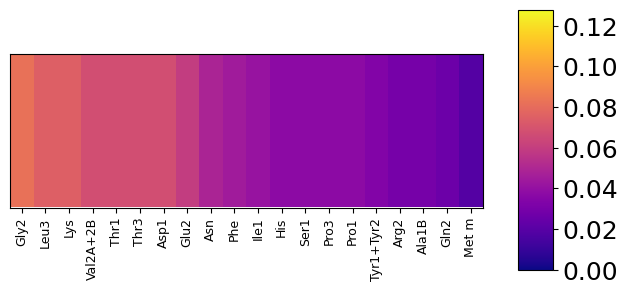

In [35]:
# Supplemental Figure showing codon-weighted distribution:

fig, ax = plt.subplots(figsize=(7,2))

x = np.arange(0,20)
y = np.array(ptRNA_sorted_codonweighted)[0:20]
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.128)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags[0:20])), tRNA_sorted_codonweighted[0:20],rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax,ticks=[0,0.02,0.04,0.06,0.08,0.10,0.12])

cbar.ax.tick_params(labelsize=18)

plt.show()

163.08704611968426
157.0782563093391


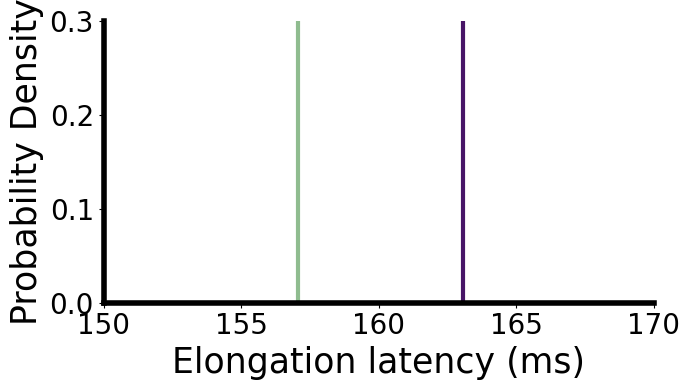

In [49]:
fig,ax4 = plt.subplots(figsize=(7,4))
ax4.plot([avg_elongt_codonweightedcorrelated]*100,np.linspace(0,0.4,100),linewidth=3,color='#481567FF')
ax4.plot([elongt_fastest]*100,np.linspace(0,0.4,100),linewidth=3,color='darkseagreen')

ax4.set_ylim(0,0.3)
ax4.set_xlim(150,170)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
print(avg_elongt_codonweightedcorrelated)
print(elongt_fastest)
plt.tight_layout()

## Elongation latency distributions for fast and wild type

In [37]:
tRNA_distributions = {}
tRNA_elongrate_distributions = {}
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

from analysis_utils import *
gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')

N=20

#uniform_elong = []
#for i in range(N):
#    #Uniform
#    ptRNA_red20_uniform = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
#    ptRNA_red20_uniform = ptRNA_red20_uniform[6]/sum(ptRNA_red20_uniform[6])
#    ptRNA_red20_uniform[ptRNA_red20_uniform>0] = 1/20

#    codon_elongt = compute_codon_elongt(ptRNA_red20_uniform, len(pCodon_GFP), ensmbl_latency_dict)
#    avg_elongt_uniform = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
#    print('elongt uniform', avg_elongt_uniform)
#    uniform_elong.append(avg_elongt_uniform)
    
ga_fast_elong = []
for i in range(N):
    codon_elongt = compute_codon_elongt(list(e['GFP_gafast'][1].values()), len(pCodon_GFP), ensmbl_latency_dict)
    avg_elongt_fast = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
    print('elongt ga fast', avg_elongt_fast)
    ga_fast_elong.append(avg_elongt_fast)

#ga_slow_elong = []
#for i in range(N):
#    codon_elongt = compute_codon_elongt(list(e['GFP_gaslow'][1].values()), len(pCodon_GFP), ensmbl_latency_dict)
#    avg_elongt_slow = compute_gene_elongt_genemap(gene_map['sfGFP_RED20'],codon_elongt)
#    print('elongt ga slow', avg_elongt_slow)
#    ga_slow_elong.append(avg_elongt_slow)

print("Uniform", np.mean(uniform_elong), " +/- ", np.std(uniform_elong))
print("GA fast", np.mean(ga_fast_elong), " +/- ", np.std(ga_fast_elong))
print("GA slow", np.mean(ga_slow_elong), " +/- ", np.std(ga_slow_elong))

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt uniform 176.5852849562453


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt uniform 177.6907808340741


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


elongt uniform 177.17341798660334


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


KeyboardInterrupt: 

NameError: name 'ga_fast_elong' is not defined

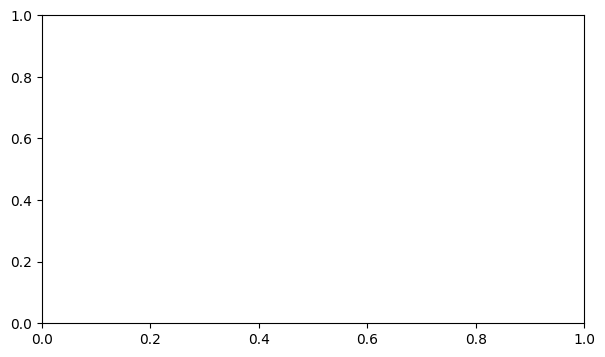

In [38]:
fig,ax = plt.subplots(figsize=(7,4))
hist=ax.hist(ga_fast_elong,color='#481567FF',bins=2,range=(155,165),density=True,alpha=0.5,hatch='x')

# Extras

## Sorting by GFP vs. transcriptome

In [ ]:
#### Sorting by transcriptome ####
ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
codon_elongt = compute_codon_elongt(ptRNA_red20, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt,red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_transcriptome,extra2=True)

ptRNA_list_uniform = np.load('./data/minimaltRNA_minimalcode-sfGFP_100sample_ptRNA.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_ptRNA.npy')
ptRNA_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_ptRNA.npy')

elongt_list_uniform = np.load('./data/minimaltRNA_minimalcode-sfGFP_100sample_elongt.npy')
elongt_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_elongt.npy')
elongt_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_elongt.npy')

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
print("fast",np.average(elongt_list_fast))

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=True,figsize=(7,6))

x = np.arange(0,40)
y = np.array(ptRNA_min_sorted)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=9)

#Uniform
ptRNA_uniform = ptRNA_list_uniform[0]
ptRNA_uniform_dict = dict(zip(tRNA_tags,ptRNA_uniform))
ptRNA_uniform_sorted=[ptRNA_uniform_dict[tRNA] for tRNA in tRNA_sorted]
x = np.arange(0,40)
y = np.array(ptRNA_uniform_sorted)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])
print("uniform",np.average(elongt_list_uniform))


#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]
print("slow",np.average(elongt_list_slow))
x = np.arange(0,40)
y = np.array(ptRNA_max_sorted)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax3.set_yticks([])
ax3.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax3.tick_params(axis='x', which='major', labelsize=9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.21, 0.05, 0.7])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()    
fig.savefig('./Figures/Heatmap_GFPexpression_fastuniformslow_transcriptomesorted.svg', dpi=300,bbox_inches='tight')

In [ ]:
#### Sorting by GFP order ####
gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_GFP,extra2=True)

ptRNA_list_uniform = np.load('./data/minimaltRNA_minimalcode-sfGFP_100sample_ptRNA.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_ptRNA.npy')
ptRNA_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_ptRNA.npy')

elongt_list_uniform = np.load('./data/minimaltRNA_minimalcode-sfGFP_100sample_elongt.npy')
elongt_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_fasttRNA_elongt.npy')
elongt_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-sfGFP_2ksample_slowtRNA_elongt.npy')

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
print(ptRNA_min_sorted)
print("fast",np.average(elongt_list_fast))

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=True,figsize=(7,6))

x = np.arange(0,40)
y = np.array(ptRNA_min_sorted)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=9)


#Uniform
ptRNA_uniform = ptRNA_list_uniform[0]
ptRNA_uniform_dict = dict(zip(tRNA_tags,ptRNA_uniform))
ptRNA_uniform_sorted=[ptRNA_uniform_dict[tRNA] for tRNA in tRNA_sorted]
x = np.arange(0,40)
y = np.ones(40)/20
y[[5,13]] = 0
y[22:] = 0
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])
print("uniform",np.average(elongt_list_uniform))


#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]
print("slow",np.average(elongt_list_slow))
x = np.arange(0,40)
y = np.array(ptRNA_max_sorted)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax3.set_yticks([])
ax3.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax3.tick_params(axis='x', which='major', labelsize=9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.21, 0.05, 0.7])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()    
fig.savefig('./Figures/Heatmap_GFPexpression_fastuniformslow_GFPsorted.svg', dpi=300,bbox_inches='tight')

## mRFP gene optimization

In [ ]:

tRNA_distributions = {}
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


from analysis_utils import *
gene_map, pCodon_mRFP = singlegene_to_genemap('./data/tables/mRFP_RED20.csv')
#wildtype
ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])

codon_elongt = compute_codon_elongt(ptRNA_red20, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_wt = compute_gene_elongt_genemap(gene_map['mRFP_RED20'],codon_elongt)
print('elongt wildtype', avg_elongt_wt)
tRNA_distributions['mRFP_RED20'] = [avg_elongt_wt,dict(zip(tRNA_tags,ptRNA_red20)),dict(zip(codon_tags,pCodon_mRFP))]

#Uniform
ptRNA_red20_uniform = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20_uniform = ptRNA_red20_uniform[6]/sum(ptRNA_red20_uniform[6])
ptRNA_red20_uniform[ptRNA_red20_uniform>0] = 1/20

codon_elongt = compute_codon_elongt(ptRNA_red20_uniform, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_uniform = compute_gene_elongt_genemap(gene_map['mRFP_RED20'],codon_elongt)
print('elongt uniform', avg_elongt_uniform)
tRNA_distributions['mRFP_uniform'] = [avg_elongt_uniform,dict(zip(tRNA_tags,ptRNA_red20_uniform)),dict(zip(codon_tags,pCodon_mRFP))]


#GFP Codon-weighted correlated

ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_mRFP,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to GFP codon-sorted tRNA
ptRNA_sorted = tRNA_weightedbycodon[tRNA_sorted_indices]
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

codon_elongt = compute_codon_elongt(resortedtRNA, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_codonweightedcorrelated = compute_gene_elongt_genemap(gene_map['mRFP_RED20'],codon_elongt)
print('elongt codon-weighted correlated', avg_elongt_codonweightedcorrelated)

tRNA_distributions['mRFP_codonweightedcorrelated'] = [avg_elongt_codonweightedcorrelated,dict(zip(tRNA_tags,resortedtRNA)),dict(zip(codon_tags,pCodon_mRFP))]


#GFP Codon-weighted anticorrelated
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_mRFP,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to GFP codon-sorted tRNA
ptRNA_sorted = tRNA_weightedbycodon[tRNA_sorted_indices]
ptRNA_sorted_flipped = np.append(np.flip([ptRNA for ptRNA in ptRNA_sorted if ptRNA != 0]),np.array([ptRNA for ptRNA in ptRNA_sorted if ptRNA == 0]))
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted_flipped))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

codon_elongt = compute_codon_elongt(resortedtRNA, len(pCodon_GFP), ensmbl_latency_dict)
avg_elongt_codonweightedanticorrelated = compute_gene_elongt_genemap(gene_map['mRFP_RED20'],codon_elongt)
print('elongt codon-weighted anticorrelated', avg_elongt_codonweightedanticorrelated)

tRNA_distributions['mRFP_codonweightedanticorrelated'] = [avg_elongt_codonweightedanticorrelated,dict(zip(tRNA_tags,resortedtRNA)),dict(zip(codon_tags,pCodon_mRFP))]


########### Genetic algorithm fast and slow #############

elongt_list_fast =np.load('./data/UniformRandomtRNA_minimalcode-mRFP_2ksample_fasttRNA_elongt.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_minimalcode-mRFP_2ksample_fasttRNA_ptRNA.npy')
elongt_fastest = np.min(elongt_list_fast)
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
tRNA_distributions['mRFP_gafast'] = [elongt_fastest,dict(zip(tRNA_tags,ptRNA_min)),dict(zip(codon_tags,pCodon_mRFP))]

elongt_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-mRFP_2ksample_slowtRNA_elongt.npy')
ptRNA_list_slow =np.load('./data/UniformRandomtRNA_minimalcode-mRFP_2ksample_slowtRNA_ptRNA.npy')
elongt_slowest = np.max(elongt_list_slow)
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
tRNA_distributions['mRFP_gaslow'] = [elongt_slowest,dict(zip(tRNA_tags,ptRNA_max)),dict(zip(codon_tags,pCodon_mRFP))]


######### Export all to pickle ##############

import pickle
with open('tRNA_distributions-mRFP.pickle', 'wb') as handle:
    pickle.dump(tRNA_distributions, handle, protocol=pickle.HIGHEST_PROTOCOL)